# LDA Project: Iris Flower Classification (Supervised Dimensionality Reduction + Classifier)
🎯 Problem Statement:
Classify different species of Iris flowers based on 4 features. Also, reduce the feature space from 4D to 2D using LDA, maximizing class separation for better visualization and modeling.


 -> Linear Discriminant Analysis (LDA) — not just as a classifier but as a supervised dimensionality reduction technique used to maximize class separability.

 | Aspect       | PCA                        | LDA                               |
| ------------ | -------------------------- | --------------------------------- |
| Type         | Unsupervised               | Supervised                        |
| Objective    | Maximize variance          | Maximize class separation         |
| Label-aware? | ❌ No                       | ✅ Yes                             |
| Use case     | Visualization, compression | Classification, feature reduction |





In [5]:
# Load Iris Dataset

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [6]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [7]:
# Apply LDA (2 Components)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)



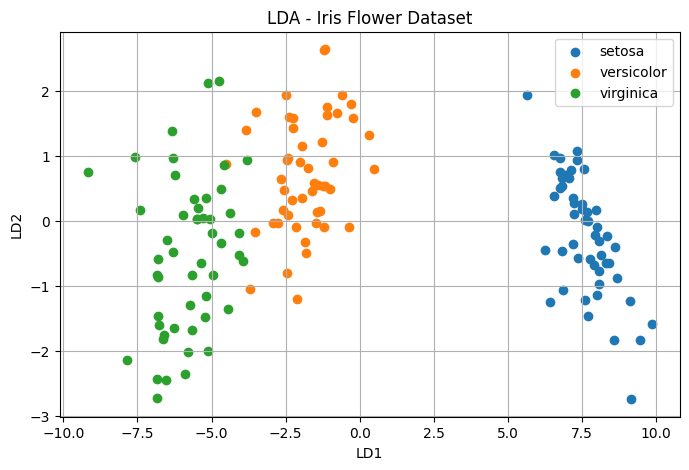

In [10]:
# Visualize LDA Output
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=iris.target_names[label])

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA - Iris Flower Dataset")
plt.legend()
plt.grid()
plt.show()

# You should see 3 well-separated clusters — LDA maximizes class separation unlike PCA.



In [11]:
# Use LDA as Classifier (not just for reduction)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



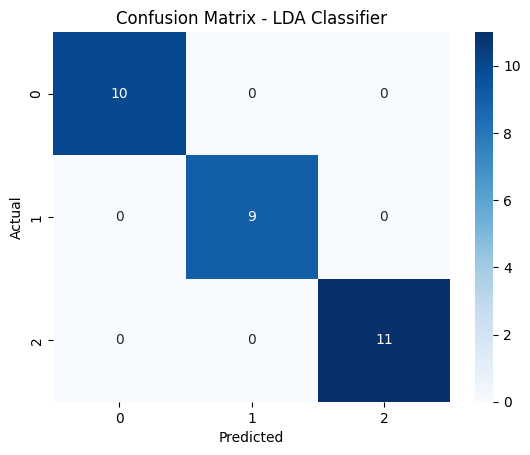

In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LDA Classifier")
plt.show()


| Pros                                 | Why It’s Useful                             |
| ------------------------------------ | ------------------------------------------- |
| 🔍 Maximizes class separation        | Great for supervised visualization          |
| 🚀 Faster training                   | Linear classifier with closed-form solution |
| 📉 Dimensionality reduction          | Improves speed, reduces noise               |
| 🧠 Interpretable decision boundaries | Easy to understand math-wise                |


| Cons                              | Why It Can Hurt                                 |
| --------------------------------- | ----------------------------------------------- |
| ❌ Assumes normal distribution     | Not always true in real-world data              |
| ❌ Assumes equal covariance        | Works best when class variances are similar     |
| ⚠️ Fails on non-linear boundaries | Better to use kernel methods or tree-based      |
| 🚫 Not good with few samples      | Overfits with high-dimensional, low-sample data |


Real-World Use Cases
🧬 Gene expression classification (cancer vs non-cancer)

📊 Financial fraud detection

📸 Facial recognition preprocessing

🎓 Student performance classification

| Step   | Action                                           |
| ------ | ------------------------------------------------ |
| Data   | Iris flowers (150 samples, 4 features)           |
| Goal   | Classify and visualize using LDA                 |
| Model  | LinearDiscriminantAnalysis                       |
| Output | Accuracy + 2D LDA scatter plot                   |
| Bonus  | Acts as both classifier + dimensionality reducer |
